Study of the eigenvalues and eigenvectors of the Toeplitz/circulant mask $B$.

In [1]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
import scipy.fft as fft
import scipy.linalg as linalg
from matplotlib.ticker import MaxNLocator

import punct_utils as utils

plt.style.use('default')
plt.rcParams["text.usetex"] = True
np.random.seed(14159)

# Set parameters

In [2]:
n = 2000
alpha = 0.01
L = int(alpha*n)
B = utils.genB(n, L, 'toeplitz')

# Define generating function

In [3]:
def f(l):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore") # avoid division by 0 warning
        return np.where(np.isclose(l%(2*np.pi), 0.), 2*L-1, np.sin((L-0.5)*l)/np.sin(l/2))
maxf = 2*L-1

# Compute eigenvalues

In [4]:
# circulant matrix
eigvals_circ = np.sort(np.array([f(2*k*np.pi/n) for k in range(n)]))

# L << n approximation
eigvals_approx = np.sort(np.array([(2*L-1)+(1/6)*(np.pi*k/n)**2*(2*L-1)*(1-(2*L-1)**2) for k in range(n)]))

# Toeplitz matrix
eigvals, eigvecs = linalg.eigh(B)

# Compute eigenvector FFT

In [5]:
eigvecs_fft = fft.fft(eigvecs, axis=0)
freq = fft.fftfreq(n)
max_freq = freq[(np.abs(eigvecs_fft)**2)[freq >= 0].argmax(axis=0)] # maximum frequency of each eigenvector

# Plot generating function

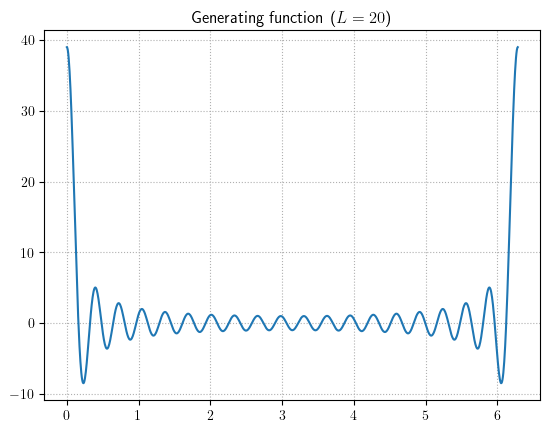

In [6]:
x = np.linspace(0., 2*np.pi, 1000)
y = f(x)
minf = np.min(y)
plt.plot(x, y)
plt.grid(ls=':')
plt.title("Generating function ($L = {}$)".format(L))
plt.show()

#  Plot eigenvalue density

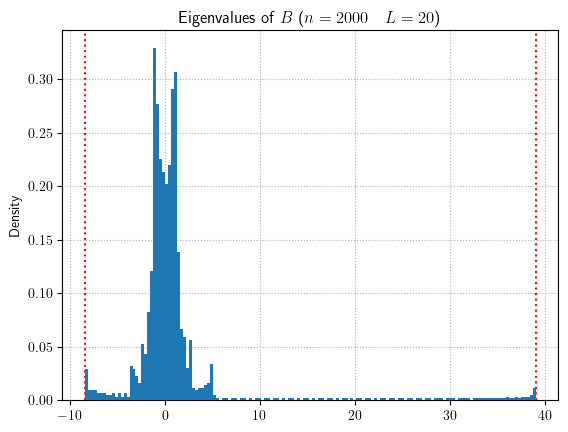

In [7]:
plt.hist(eigvals, bins='auto', density=True, zorder=3)
plt.axvline(x=minf, ls=':', color='red')
plt.axvline(x=maxf, ls=':', color='red')
plt.grid(ls=':')
plt.ylabel("Density")
plt.title("Eigenvalues of $B$ ($n = {} \\quad L = {}$)".format(n, L))
plt.show()

# Comparison between first eigenvalues

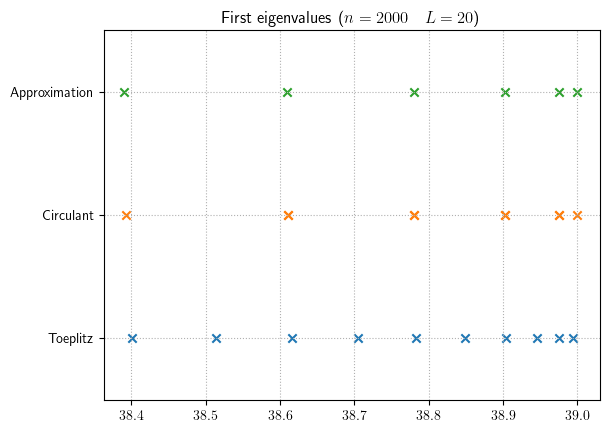

In [8]:
top = 10
plt.scatter(eigvals[-top:], np.ones(top)*1, marker='x')
plt.scatter(eigvals_circ[-top:], np.ones(top)*2, marker='x')
xmin, xmax = plt.xlim()
plt.scatter(eigvals_approx[-top:], np.ones(top)*3, marker='x')
plt.xlim(xmin, xmax)
plt.ylim(0.5, 3.5)
plt.yticks([1, 2, 3], labels=['Toeplitz', 'Circulant', 'Approximation'])
plt.grid(ls=':')
plt.title("First eigenvalues ($n = {} \\quad L = {}$)".format(n, L))
plt.show()

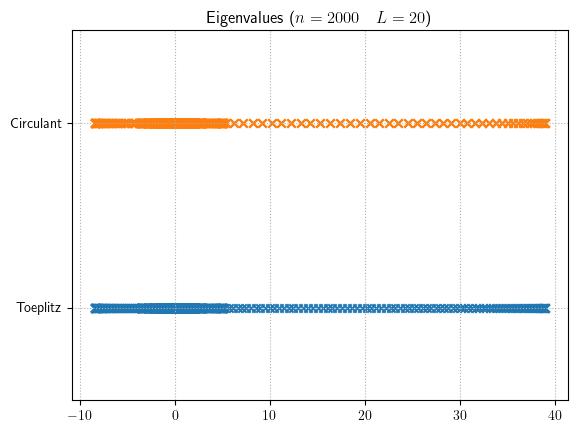

In [9]:
plt.scatter(eigvals, np.ones(n)*1, marker='x')
plt.scatter(eigvals_circ, np.ones(n)*2, marker='x')
plt.ylim(0.5, 2.5)
plt.yticks([1, 2], labels=['Toeplitz', 'Circulant'])
plt.grid(ls=':')
plt.title("Eigenvalues ($n = {} \\quad L = {}$)".format(n, L))
plt.show()

# Plot eigenvector maximum frequency

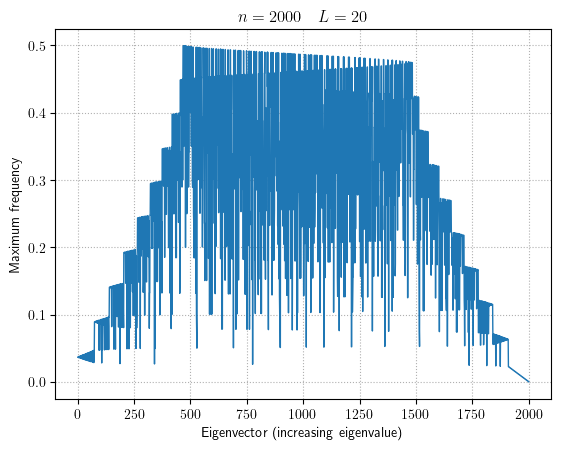

In [10]:
plt.plot(np.arange(1, n+1), max_freq, marker='', linewidth=1)
plt.grid(ls=':')
plt.xlabel("Eigenvector (increasing eigenvalue)")
plt.ylabel("Maximum frequency")
plt.title("$n = {} \\quad L = {}$".format(n, L))
plt.show()

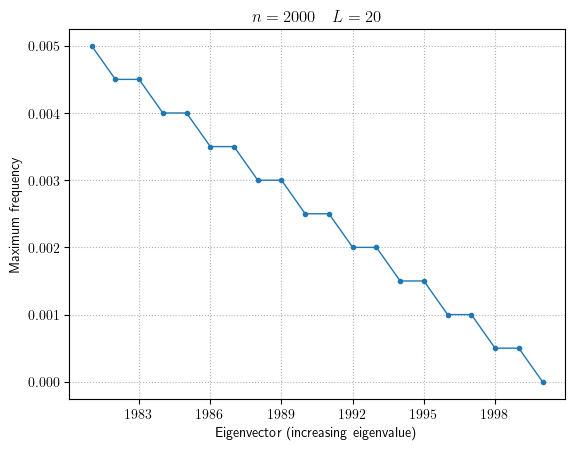

In [11]:
top = 20
ax = plt.figure().gca()
plt.plot(np.arange(1, n+1)[-top:], max_freq[-top:], marker='.', linewidth=1)
plt.grid(ls=':')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel("Eigenvector (increasing eigenvalue)")
plt.ylabel("Maximum frequency")
plt.title("$n = {} \\quad L = {}$".format(n, L))
plt.show()

# Plot eigenvectors

#### First 20 eigenvectors

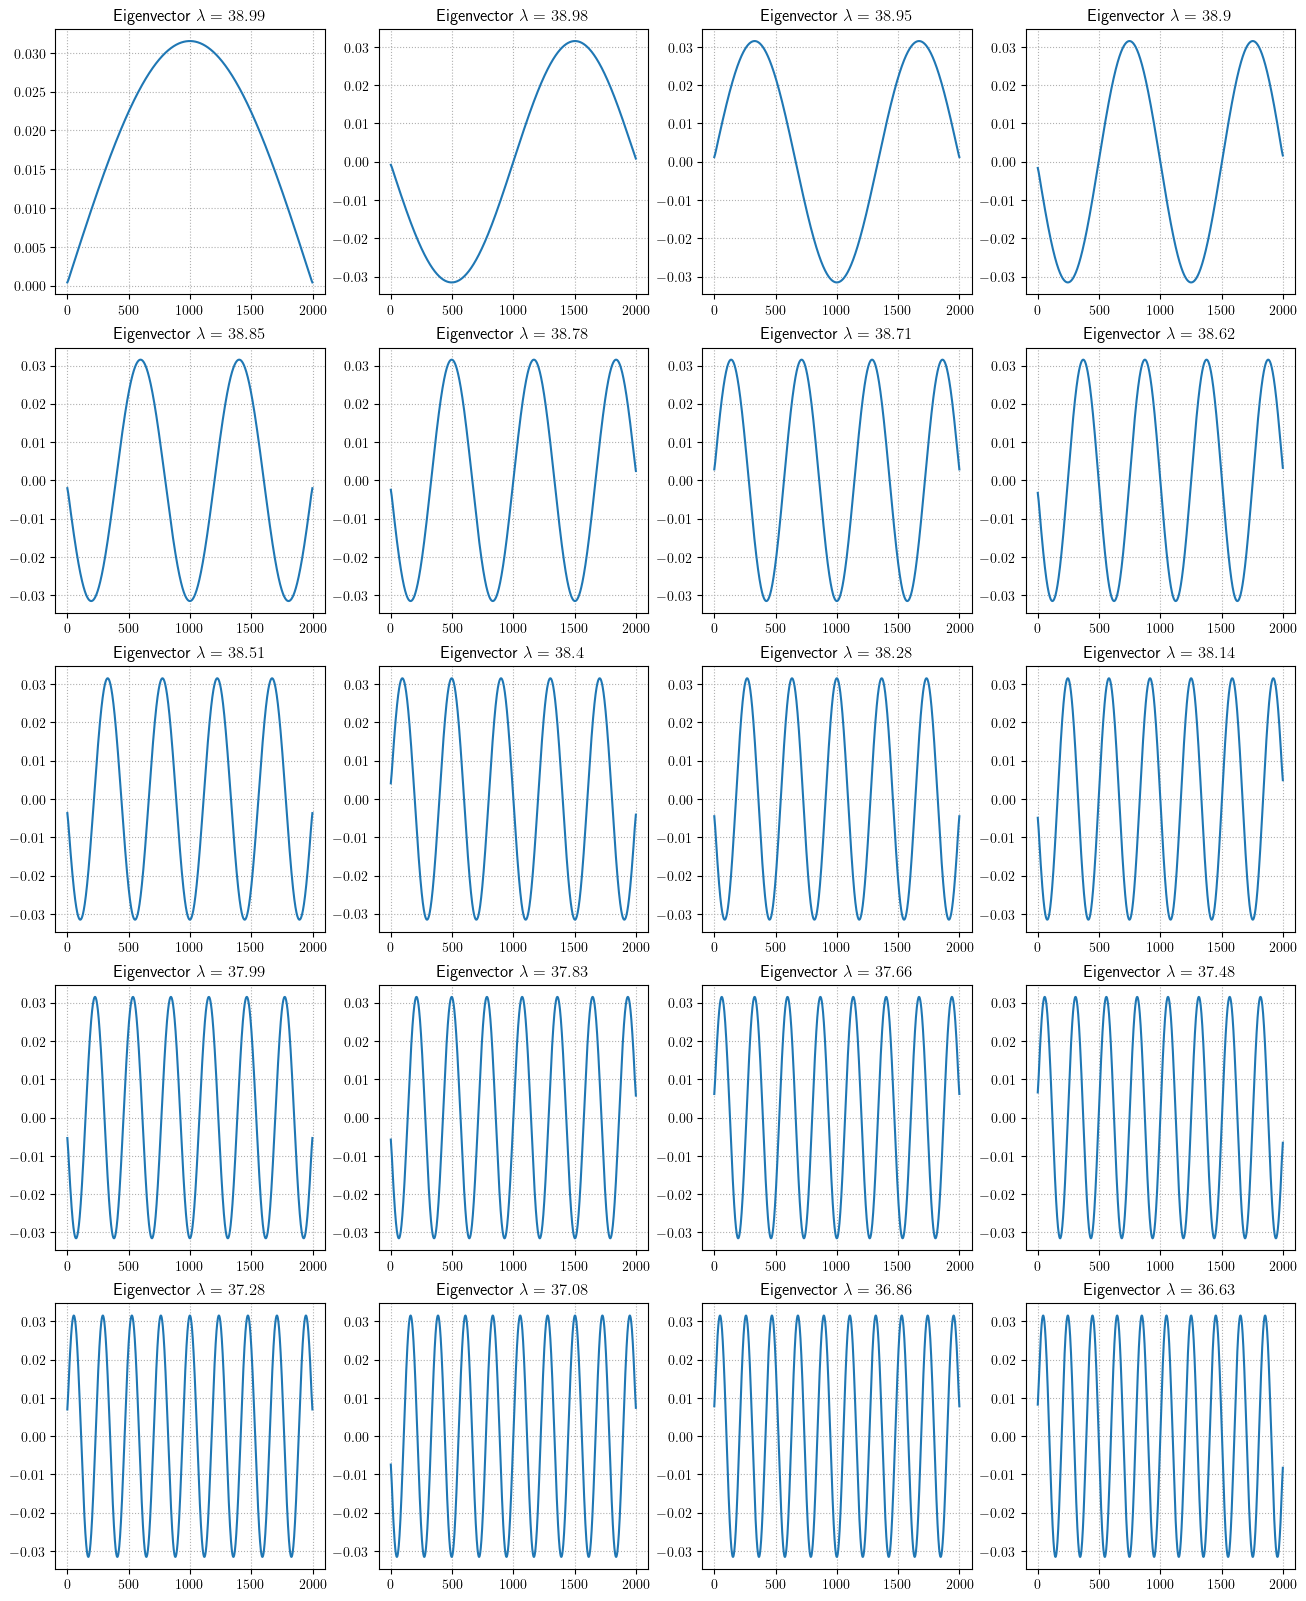

In [12]:
fig, ax = plt.subplots(5, 4, figsize=(16, 20))
for i in range(5):
    for j in range(4):
        idx = n-1-(i*4+j)
        ax[i, j].plot(eigvecs[:, idx])
        ax[i, j].grid(ls=':')
        ax[i, j].set_title("Eigenvector $\lambda = {}$".format(np.round(eigvals[idx], 2)))
plt.show()

#### Last 20 eigenvectors

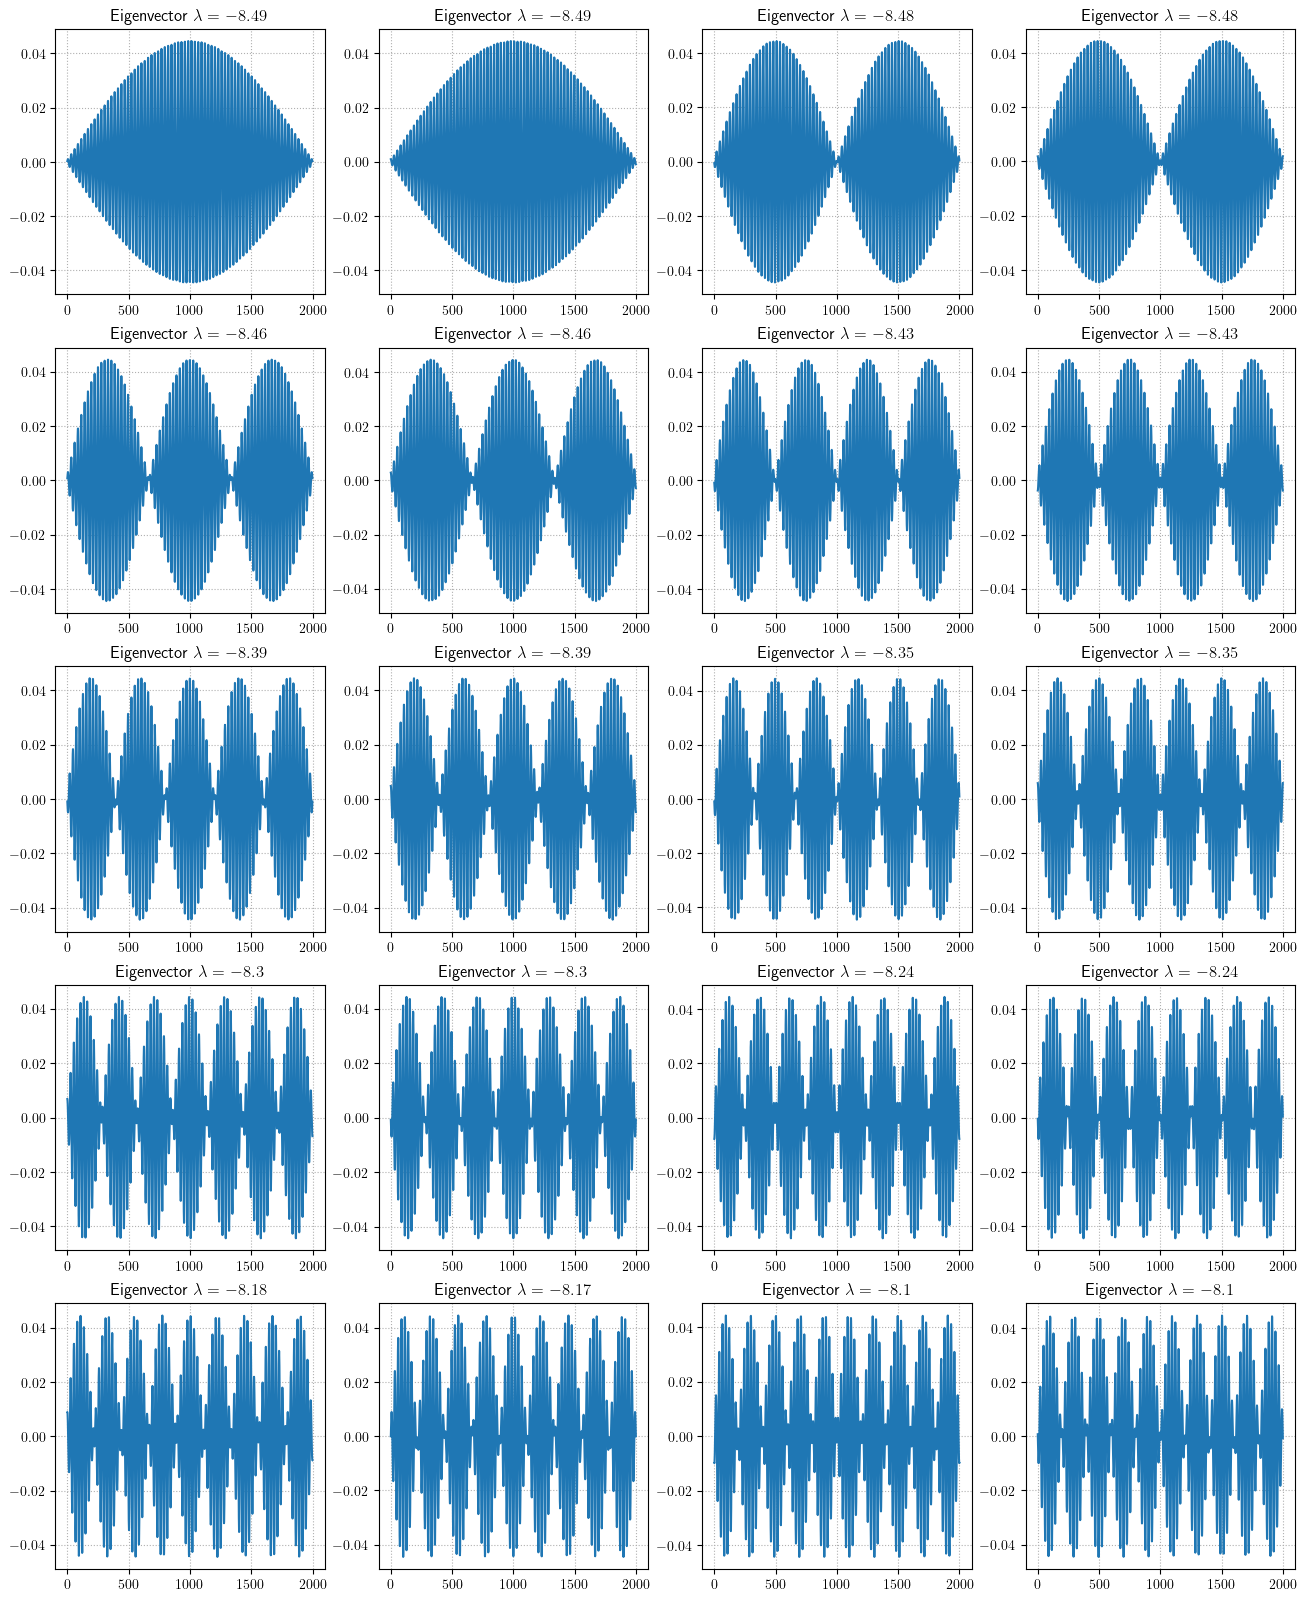

In [13]:
# Last 20 eigenvectors
fig, ax = plt.subplots(5, 4, figsize=(16, 20))
for i in range(5):
    for j in range(4):
        idx = i*4+j
        ax[i, j].plot(eigvecs[:, idx])
        ax[i, j].grid(ls=':')
        ax[i, j].set_title("Eigenvector $\lambda = {}$".format(np.round(eigvals[idx], 2)))
plt.show()